# Módulo II - mini projeto 2 - Visualização de Dados

O projeto pode ser feito em até 4 integrantes

Para a entrega, coloque o notebook respondido no seu github (um por grupo) ou, em último caso, salvar o notebook e enviar via chat do class.

Usando os dados do mini projeto 1 com algumas colunas acrescentadas

Arquivo: investidores.csv

Colunas extras:
- Reserva: Valor da reserva de emergência
- Invest_curto_prazo, Invest_longo_prazo, Invest_medio_prazo : investimento disponível a curto, médio e longo prazo
- Total: total já investido

Responda cada item graficamente. Você pode usar o matplotlib, gráfico do pandas, seaborn ou plotly.

O projeto contém 3 bônus, que são opcionais


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly

In [2]:
## Carregar o arquivo investidores.csv

df = pd.read_csv('https://raw.githubusercontent.com/renatapink/DSdegree/master/Modulo2/Mini_projeto2/investidores.csv')
df.columns

Index(['id', 'Nome', 'Sexo', 'idade', 'Email', 'Job', 'Estado', 'Renda',
       'Perfil', 'Ativo01', 'Ativo02', 'Ativo03', 'Ativo04', 'Ativo05',
       'Ativo06', 'Ativo07', 'Total', 'Reserva', 'Invest_curto_prazo',
       'Invest_medio_prazo', 'Invest_longo_prazo'],
      dtype='object')

## 1) Faça um gráfico para ver a distribuição da idade dos investidores
dica: histograma

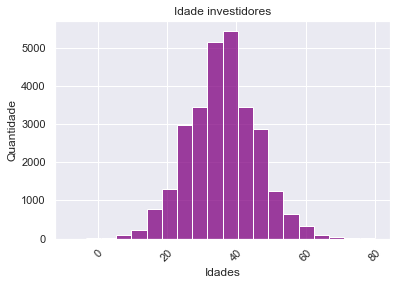

In [3]:

sns.set(style="darkgrid")
sns.histplot(data=df, x='idade', bins=20, color='purple')
plt.title('Idade investidores')
plt.xticks(rotation=45)
plt.xlabel('Idades')
plt.ylabel('Quantidade')


plt.show()

## 2) Faça um gráfico de pizza para ver a distribuição dos perfis dos investidores
Coloque o valor das porcentagens e a legenda  
dica: usar value_counts() 

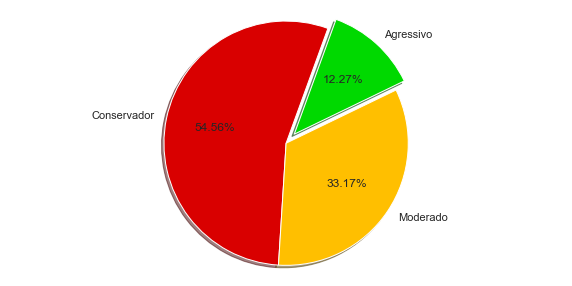

In [4]:
x= df['Perfil'].value_counts()
label = ['Conservador', 'Moderado', 'Agressivo']
colors = ['#D90000', '#FFBF00', '#00D900']

plt.rcParams["figure.figsize"] = (10,5)

plt.pie(x, labels=label, startangle=70, shadow=True, autopct='%1.2f%%', explode=[0, 0, 0.1], colors=colors)

plt.axis('equal')

plt.show()


## 3) Faça um gráfico de barras verticais da quantidade de investidores por estado
dica: usar value_counts() ou groupby

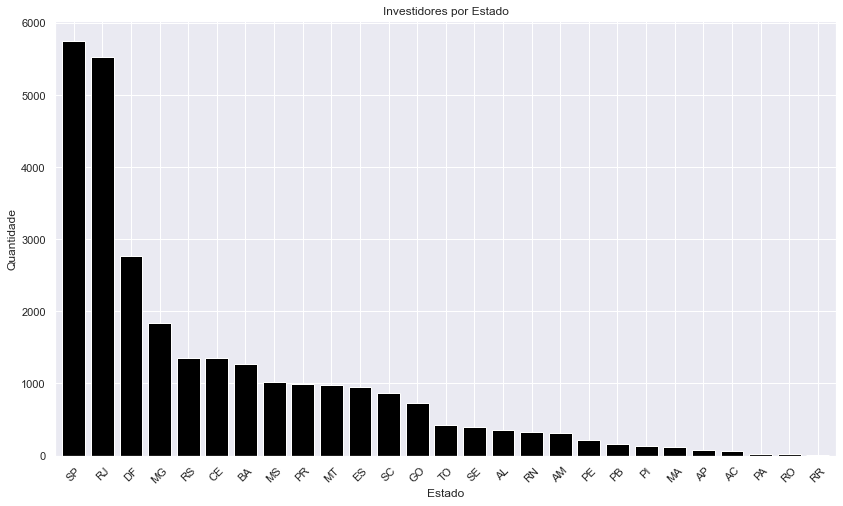

In [5]:
plt.figure(figsize=(14,8))
df['Estado'].value_counts().plot(kind='bar', color='black', width=0.8)
plt.title('Investidores por Estado')
plt.xticks(rotation=45)
plt.xlabel('Estado')
plt.ylabel('Quantidade')

plt.show()

## 4) Faça um gráfico de barras horizontais da soma dos ativos01 a ativos07
dica: pode usar df[['Ativo01','Ativo02','Ativo03','Ativo04','Ativo05','Ativo06','Ativo07']].sum()

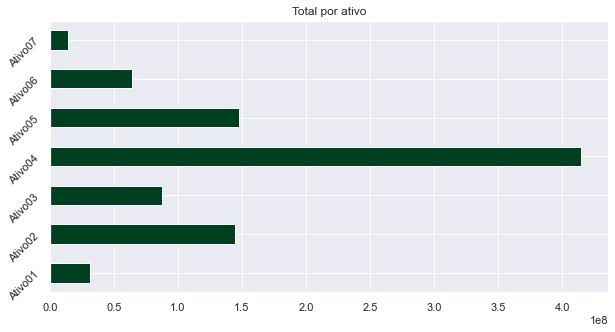

In [6]:
x = df[['Ativo01','Ativo02','Ativo03','Ativo04','Ativo05','Ativo06','Ativo07']].sum()

x.plot(kind='barh', title='Total por ativo', color='#004020', grid=True)
plt.yticks(rotation=45)

plt.show()

## 5) Faça um gráfico para ver a distribuição dos valores do Ativo07 usando boxplot
Na mesma figura compare a distribuição do Ativo07 em cada estado


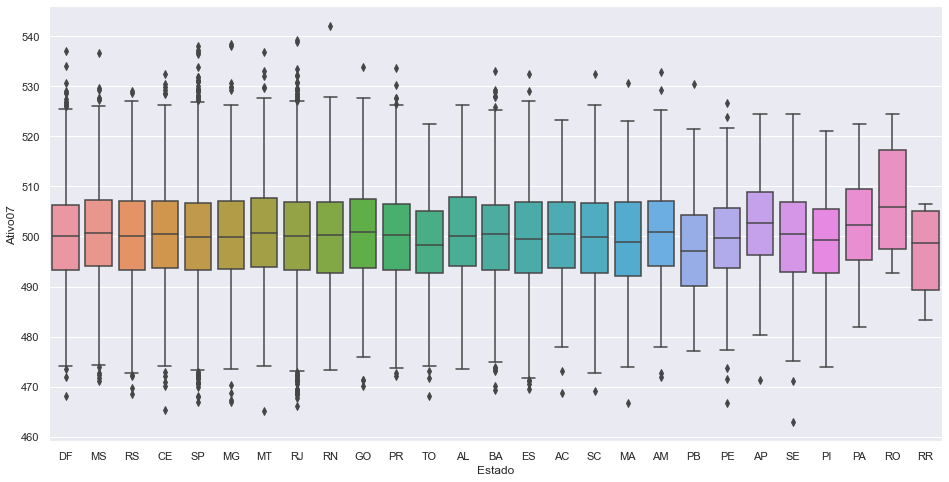

In [7]:
plt.figure(figsize=(16,8))

sns.boxplot(data=df, y='Ativo07', x='Estado')

plt.show()

## 6) Faça um gráfico de disperção dos Ativo04 e Ativo07
Na mesma figura use cores para identificar o perfil

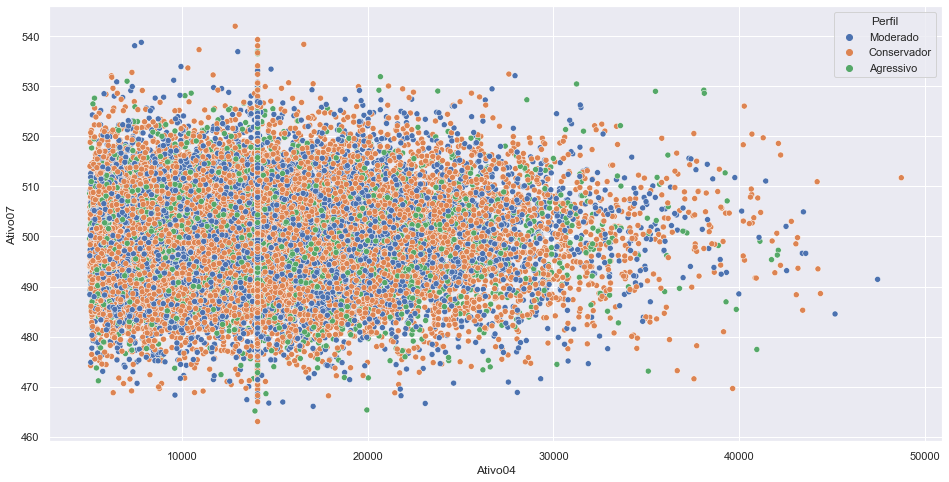

In [8]:
plt.figure(figsize=(16,8))

sns.scatterplot(data=df, x='Ativo04', y='Ativo07', hue='Perfil')

plt.show()

## 7) Faça um mapa de calor com a correlação entre Renda, Reserva, Investimentos a curto, médio e longo prazo
Coloque argumentos de anotação e use o cmap = 'plasma'
dica: Use essa correlação - df[['Renda','Invest_curto_prazo','Invest_medio_prazo','Invest_longo_prazo', 'Reserva']].corr()

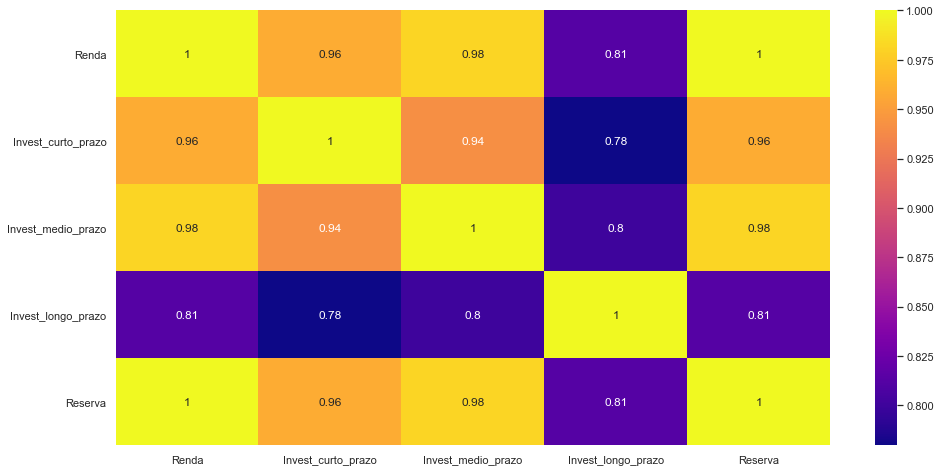

In [9]:
corr = df[['Renda','Invest_curto_prazo','Invest_medio_prazo','Invest_longo_prazo', 'Reserva']].corr()

plt.figure(figsize=(16,8))

sns.heatmap(data=corr, annot=True, cmap='plasma')

plt.show()

## 8) No gráfico de linhas abaixo, acrescente:
- Título: Total de investimento em cada ativo
- Mude o tamanho da figura
- Nome nos eixos
- Linha vermelha horizontal em 50000000
- Grade
- Rotacione os ticks do eixo x em 45º
- Mude os ticks do eixo y para azul
- Legenda no centro da figura

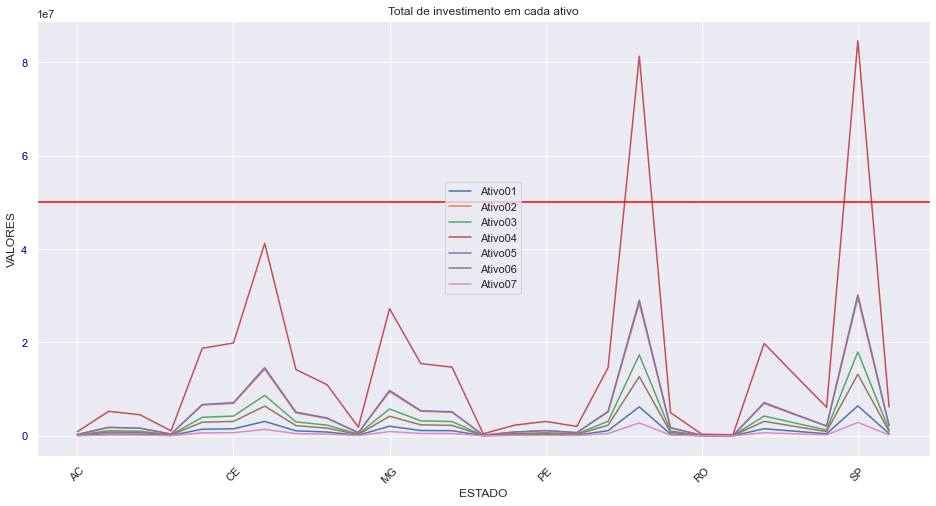

In [10]:
dados = df.groupby(['Estado'])[['Ativo01', 'Ativo02', 'Ativo03', 'Ativo04', 'Ativo05', 'Ativo06', 'Ativo07']].sum()

dados.plot(figsize=(16,8), grid=True)
plt.title('Total de investimento em cada ativo')
plt.xlabel('ESTADO')
plt.ylabel('VALORES')
plt.axhline(50000000, color='red')
plt.xticks(rotation=45)
plt.yticks(color='darkblue')
plt.legend(loc=10)

plt.show()

# Bônus 1

Faça uma nuvem de palavras com a profissão dos investidores. Altere o tamanho, o fundo e personalize a figura

instalação:

`conda install -c conda-forge worcloud`

código:

`from wordcloud import WordCloud
import matplotlib.pyplot as plt`

`text=','.join(df['Job'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()`

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

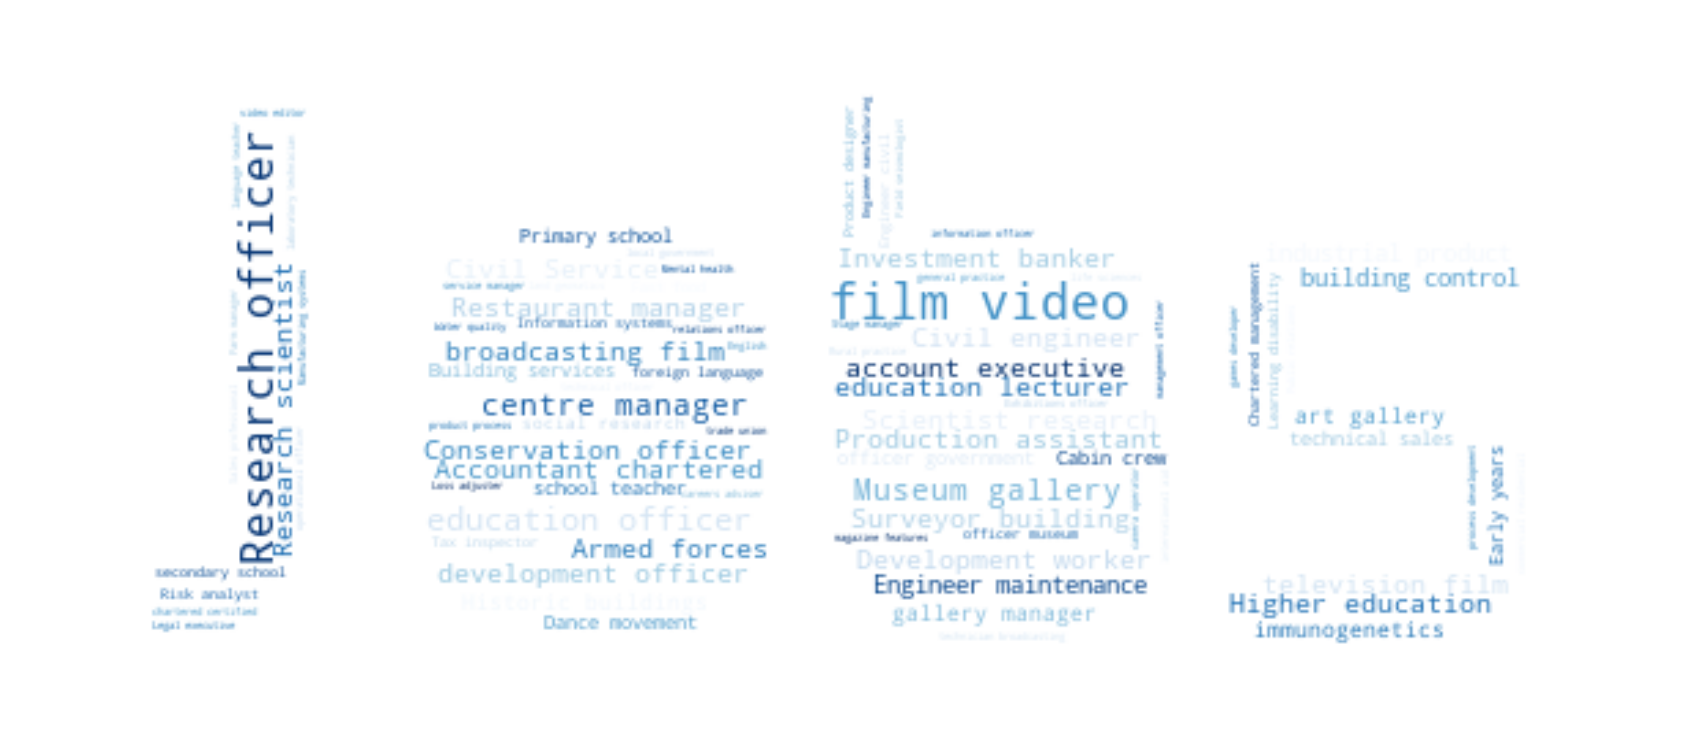

In [30]:
text = ','.join(df['Job'])

mask = np.array(Image.open("jobs.jpg"))
t_mask = np.ndarray((mask.shape[0], mask.shape[1]), np.int32)
fix_mask = np.vectorize(lambda n:255 if n==255 else 0)

t_mask = fix_mask(mask)

wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='Blues', mode='RGBA', mask=t_mask).generate(text)

plt.figure(figsize=(30, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Bônus 2

Usando técnica de machine learning chamada **kmeans**, divida os investidores em 5 grupos com relação ao que foi investido em cada ativo. Por exemplo, pessoas que tiveram investimentos parecidos em cada ativo, devem ficar no mesmo grupo. Para visualizar, use um gráfico de dispersão do ativo04 e ativo07 e acrescente os grupos usando cores.

O Kmeans é um algoritmo de machine learning não supervisionado que agrupa (cluster) de acordo com suas características


Podemos resumir o algoritmo nos seguintes passos:


- Step 1: Escolha o número de grupos (clusters) k 

- Step 2: Selecione k pontos aleatoriamente (chamados de centroides)

- step 3: Atribuir todos os pontos ao centróide do cluster mais próximo
Selecione um ponto e calcule a distância desse ponto a cada centróide. Ele fará parte do cluster com o centróide mais próximo. Faça isso com todos os pontos

- step 4: Recalcule o centróide com o grupo desses pontos

- Step 5: Repita o steps 3 e 4 até que nenhum ponto saia do grupo (cluster)


In [31]:
df['Job'].value_counts()

Tax inspector                         65
Designer, industrial/product          64
Surveyor, planning and development    63
Tourist information centre manager    62
Youth worker                          61
                                      ..
Clinical biochemist                   29
Occupational therapist                29
Politician's assistant                28
Community pharmacist                  26
Food technologist                     25
Name: Job, Length: 639, dtype: int64

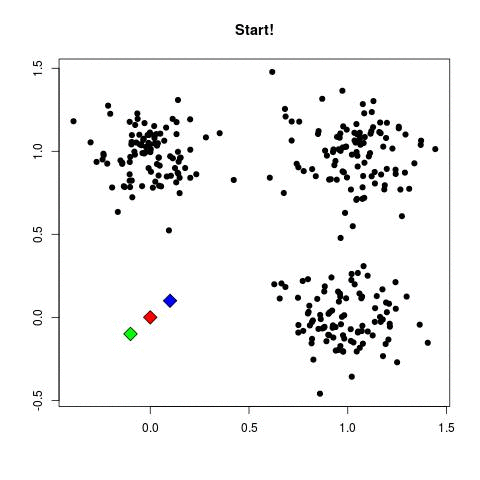

instalação  
`conda install -c conda-forge scikit-learn`

<AxesSubplot:xlabel='Ativo04', ylabel='Ativo07'>

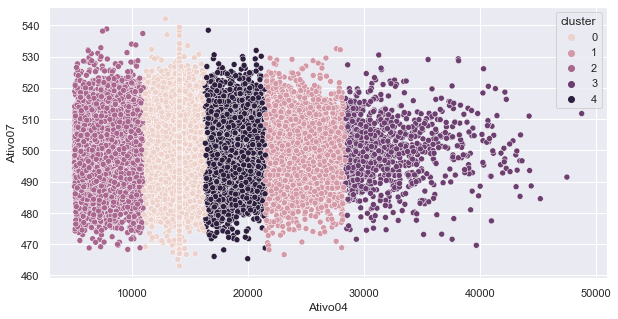

In [32]:
from sklearn.cluster import KMeans

X = df[['Ativo01', 'Ativo02', 'Ativo03', 'Ativo04', 'Ativo05', 'Ativo06', 'Ativo07']]
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

df['cluster'] = kmeans.labels_

sns.scatterplot(data=df, x='Ativo04', y='Ativo07', hue='cluster')

## Bônus 3
Com os dados BVSP que usamos nas aulas (https://raw.githubusercontent.com/renatapink/DSdegree/master/Modulo2/Aula05/BVSP2.csv) , faça um gráfico candlestick dos últimos dias

`conda install -c conda-forge mplfinance`

Fonte para pesquisa:
https://coderzcolumn.com/tutorials/data-science/candlestick-chart-in-python-mplfinance-plotly-bokeh

In [33]:
import mplfinance as mpf

ibov = pd.read_csv('https://raw.githubusercontent.com/renatapink/DSdegree/master/Modulo2/Aula05/BVSP2.csv')

ibov['Date'] = pd.to_datetime(ibov['Date']) # transformando em datetime
ibov = ibov.set_index('Date') # Formato DatetimeIndex, a data tem que estar no index
mpf.plot(ibov[-30:], type='candle', style='yahoo', volume=True) # ibov[-30:] usando os últimos 30 registros

ModuleNotFoundError: No module named 'mplfinance'